In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/vehicles.csv",nrows=1000 )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   url           1000 non-null   object 
 2   region        1000 non-null   object 
 3   region_url    1000 non-null   object 
 4   price         1000 non-null   int64  
 5   year          963 non-null    float64
 6   manufacturer  903 non-null    object 
 7   model         965 non-null    object 
 8   condition     580 non-null    object 
 9   cylinders     653 non-null    object 
 10  fuel          960 non-null    object 
 11  odometer      970 non-null    float64
 12  title_status  930 non-null    object 
 13  transmission  973 non-null    object 
 14  VIN           630 non-null    object 
 15  drive         687 non-null    object 
 16  size          249 non-null    object 
 17  type          707 non-null    object 
 18  paint_color   770 non-null   

In [ ]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year              37
manufacturer      97
model             35
condition        420
cylinders        347
fuel              40
odometer          30
title_status      70
transmission      27
VIN              370
drive            313
size             751
type             293
paint_color      230
image_url         27
description       27
county          1000
state              0
lat               35
long              35
posting_date      27
dtype: int64

In [ ]:
features = ['year', 'odometer']
target = 'price'

In [ ]:
df_subset = df.dropna(subset=features + [target])


In [ ]:
df_subset['cylinders'] = pd.to_numeric(df_subset['cylinders'], errors='coerce')


<ipython-input-10-c2c659a2fc04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cylinders'] = pd.to_numeric(df_subset['cylinders'], errors='coerce')


In [ ]:
df_subset = df_subset.dropna(subset=features + [target])


In [ ]:
X = df_subset[features]
y = df_subset[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 34737031532121.83
R-squared: -153684.77


In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-6958229.65137634   308272.48152839]
Intercept: 1304833.6067707764


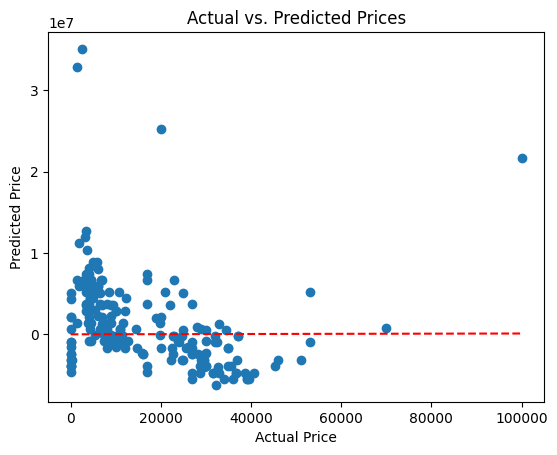

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


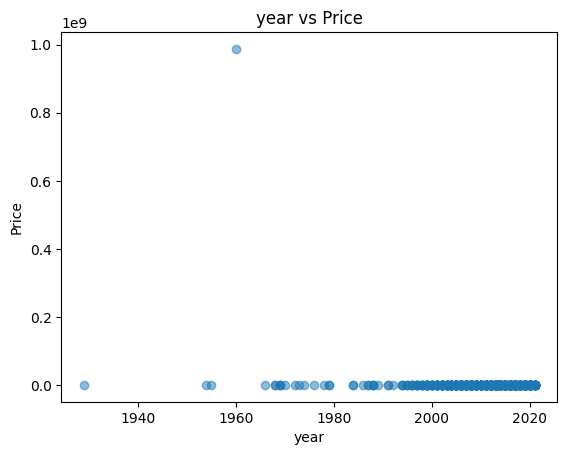

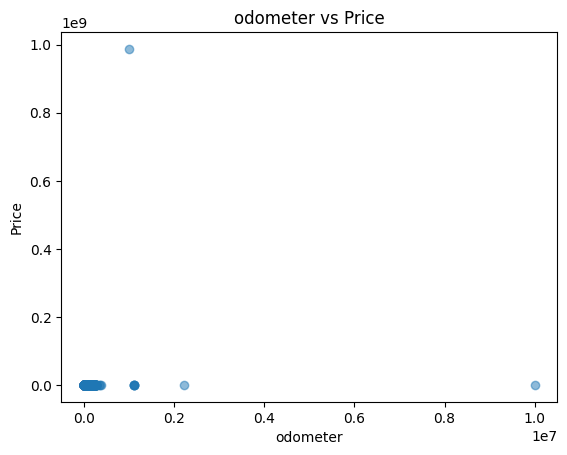

In [ ]:
import matplotlib.pyplot as plt

# Plotting each feature against the target variable (price)
for feature in features:
    plt.scatter(df_subset[feature], df_subset[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
    plt.show()


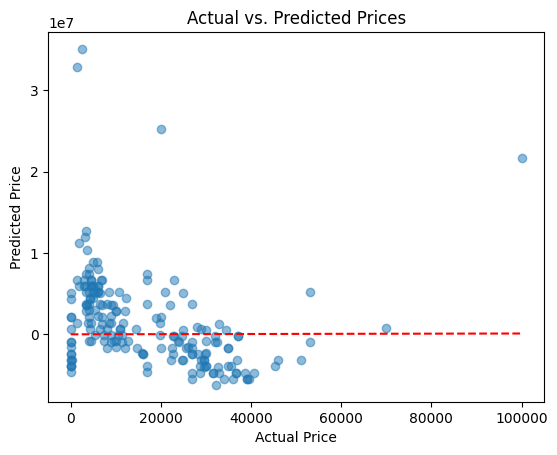

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [ ]:
def predict_user_input():
    year = int(input("Enter the year of the vehicle: "))
    odometer = float(input("Enter the odometer reading (in miles): "))
    user_input_df = pd.DataFrame([[year, odometer]], columns=features)
    user_input_scaled = scaler.transform(user_input_df)
    predicted_price = model.predict(user_input_scaled)
    print(f"The predicted price for the vehicle is: ${predicted_price[0]:.2f}")

predict_user_input()


Enter the year of the vehicle: 2005
Enter the odometer reading (in miles): 40000
The predicted price for the vehicle is: $5814459.62
